In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
import missingno

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import selected dataframe with the data that will be used to train the Machine Learning algorithm 
clean_train = pd.read_csv('HR_Clean_Analytic_train.csv')
clean_train.head()

,Attrition,EmployeeID,MonthlyIncome,PerformanceRating,PercentSalaryHike,JR_HealthRep,JR_HHRR,JR_LabTec,JR_Man,JR_MftDir,...,Ed_HHRR,Ed_LifeSci,Ed_Mktg,Ed_Med,Ed_Tech,Ed_Other,BusinessTravel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,131160,3,11,1,0,0,0,0,...,0,1,0,0,0,0,1,6,0,0
1,1,2,41890,4,23,0,0,0,0,0,...,0,1,0,0,0,0,2,3,1,4
2,0,3,193280,3,15,0,0,0,0,0,...,0,0,0,0,0,1,2,2,0,3
3,0,4,83210,3,11,0,1,0,0,0,...,0,1,0,0,0,0,0,5,7,5
4,0,5,23420,3,12,0,0,0,0,0,...,0,0,0,1,0,0,1,2,0,4


In [3]:
# Split the dataframe into data and labels
X_axis = clean_train.drop('Attrition', axis=1) # This will be the data
y_axis = clean_train.Attrition # This will be the labels

In [4]:
# Shape of the data (without labels)
X_axis.head()

,EmployeeID,MonthlyIncome,PerformanceRating,PercentSalaryHike,JR_HealthRep,JR_HHRR,JR_LabTec,JR_Man,JR_MftDir,JR_ResDir,...,Ed_HHRR,Ed_LifeSci,Ed_Mktg,Ed_Med,Ed_Tech,Ed_Other,BusinessTravel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager
0,1,131160,3,11,1,0,0,0,0,0,...,0,1,0,0,0,0,1,6,0,0
1,2,41890,4,23,0,0,0,0,0,0,...,0,1,0,0,0,0,2,3,1,4
2,3,193280,3,15,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,0,3
3,4,83210,3,11,0,1,0,0,0,0,...,0,1,0,0,0,0,0,5,7,5
4,5,23420,3,12,0,0,0,0,0,0,...,0,0,0,1,0,0,1,2,0,4


In [5]:
y_axis.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [6]:
# Function to get some the accuracy metrics
# The algorithms that I will test are from the sklearn library 
# As they take similar inputs and generates similar outputs, is good to have function to avoid writing the same code.

def accuracy_metric(algorithm, X_axis, y_axis, cross_val):
    
    # Try the estimator with one execution
    estimator = algorithm.fit(X_axis, y_axis)
    accuracy = round(estimator.score(X_axis, y_axis) * 100, 2)
    
    # Cross Validation (multiples executions with The data split according to the cv parameter)
    estimator_cv = model_selection.cross_val_predict(algorithm,  # The algorithm to use to fit the data
                                                  X_axis,        # The data to fit
                                                  y_axis,        # The target variable
                                                  cv=cross_val,  # Number of splits
                                                  n_jobs = -1)   # Using all processors to do the computation
    # Cross-validation accuracy metric
    accuracy_cv = round(metrics.accuracy_score(y_axis, estimator_cv) * 100, 2)
    
    return estimator_cv, accuracy, accuracy_cv

<h1>Algorithm Accuracy Test</h1><p>
<p><span style="color: #ff6600;">Test different algorithm to identify their accuracy with the provided data</span></p>


In [7]:
# Algorithm: Logistic Regression 
start_time = time.time()
log_train_pred, log_accuracy, log_crossVal = accuracy_metric(LogisticRegression(), X_axis, y_axis, 10)

log_time = (time.time() - start_time)
print("Accuracy: %s" % log_accuracy)
print("Accuracy CV 10-Fold: %s" % log_crossVal)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 83.84
Accuracy CV 10-Fold: 83.84
Running Time: 0:00:02.658001


In [8]:
# Algorithm: k-Nearest Neighbours
start_time = time.time()
knn_train_pred, knn_accuracy, knn_crossVal = accuracy_metric(KNeighborsClassifier(), X_axis, y_axis, 10)

knn_time = (time.time() - start_time)
print("Accuracy: %s" % knn_accuracy)
print("Accuracy CV 10-Fold: %s" % knn_crossVal)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 84.93
Accuracy CV 10-Fold: 81.21
Running Time: 0:00:00.675028


In [9]:
# Algorithm: Gaussian Naive Bayes
start_time = time.time()
gnd_train_pred, gnd_accuracy, gnd_crossVal = accuracy_metric(GaussianNB(), X_axis, y_axis, 10)

gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % gnd_accuracy)
print("Accuracy CV 10-Fold: %s" % gnd_crossVal)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 83.84
Accuracy CV 10-Fold: 83.84
Running Time: 0:00:00.199681


In [10]:
# Algorithm: Decision Tree Classifier
start_time = time.time()
dtc_train_pred, dtc_accuracy, dtc_crossVal = accuracy_metric(DecisionTreeClassifier(), X_axis, y_axis, 10)

dt_time = (time.time() - start_time)
print("Accuracy: %s" % dtc_accuracy)
print("Accuracy CV 10-Fold: %s" % dtc_crossVal)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 99.6
Running Time: 0:00:00.210870


In [11]:
# Algorithm: Gradient Boosting Trees
start_time = time.time()
gbt_train_pred, gbt_accuracy, gbt_crossVal = accuracy_metric(GradientBoostingClassifier(), X_axis, y_axis, 10)

gbt_time = (time.time() - start_time)
print("Accuracy: %s" % gbt_accuracy)
print("Accuracy CV 10-Fold: %s" % gbt_crossVal)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 89.84
Accuracy CV 10-Fold: 88.56
Running Time: 0:00:02.676677


<h2>Comparison of Results</h2>


In [12]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'k-Nearest Neighbours', 
              'Gaussian Naive Bayes', 'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        log_accuracy,
        knn_accuracy, 
        gnd_accuracy, 
        dtc_accuracy,
        gbt_accuracy,
    ]})

cv_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'k-Nearest Neighbours', 
              'Gaussian Naive Bayes', 'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        log_crossVal, 
        knn_crossVal,      
        gnd_crossVal, 
        dtc_crossVal,
        gbt_crossVal,
    ]})

results = pd.DataFrame()
results['Model'] = models['Model']
results['Score'] = models['Score']
results['CV Score'] = cv_models['Score']


print("---Reuglar Accuracy Scores---")
results.sort_values(by='CV Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score,CV Score
3,Decision Tree,100.00,99.60
4,Gradient Boosting Trees,89.84,88.56
0,Logistic Regression,83.84,83.84
2,Gaussian Naive Bayes,83.84,83.84
1,k-Nearest Neighbours,84.93,81.21


<p><span style="color: #ff6600;">The most accurate model is the Decision Tree Classifier</span></p>

In [13]:
# The selected algorithm will be the Decision tree Classifier
# Split the dataset for train and test using the best random split

X = X_axis.values
Y = y_axis.values
indices = X_axis['EmployeeID']
X_train, X_test, Y_train, Y_test, Index_train, Index_test = train_test_split(X, Y, indices, test_size=0.25, random_state = 4)


In [14]:
decision = tree.DecisionTreeClassifier(criterion='gini')
decision.fit(X_train, Y_train)

y_pred = decision.predict(X_test)
y_score = decision.score(X_test, Y_test)
print('Accuracy: ', y_score)

# Compute the average precision score
micro_precision = precision_score(y_pred, Y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, Y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, Y_test, average=None)
print('Per-class precision score:', per_class_precision)

Accuracy:  0.986046511627907
Micro-averaged precision score: 0.99
Macro-averaged precision score: 0.97
Per-class precision score: [0.9921875  0.95530726]


<h1>DataFrame Column Importance</h1><p>
Check the importance of each column inside the dataframe. Sometimes droping a column gets more accuracy on the models

In [15]:
# DataFrame column importance
def data_importance(algorithm, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': algorithm.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 20))

#    return fea_imp

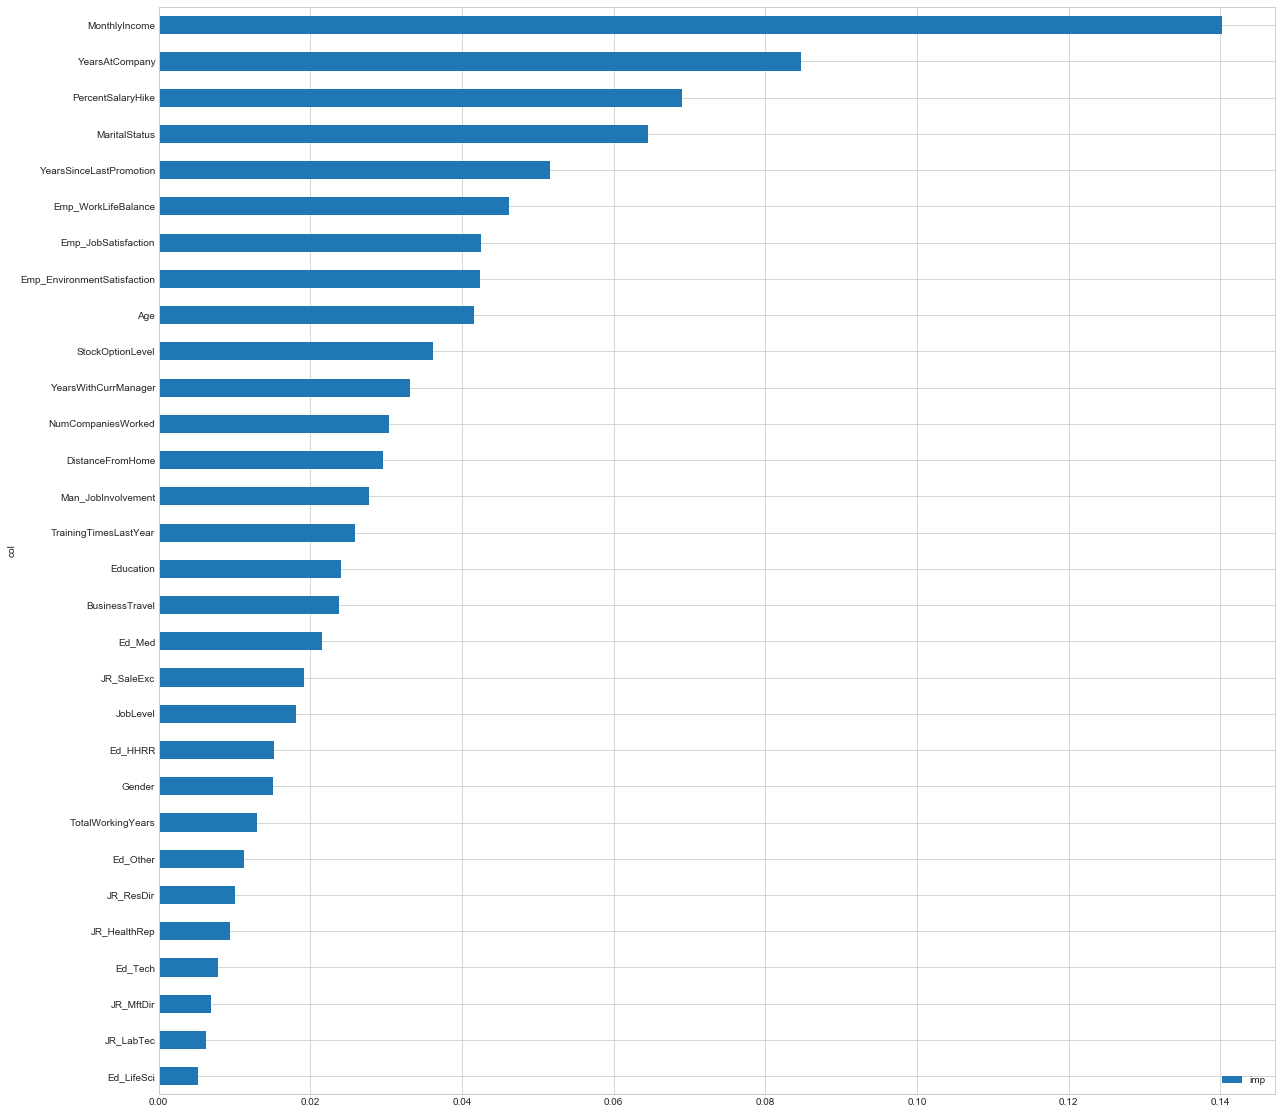

In [16]:
# Plot the feature importance scores
data_importance(decision, X_axis)

In [17]:
from sklearn.tree import export_graphviz

feature_names = [i for i in X_axis.columns]
export_graphviz(
        decision,
        out_file="attrition_tree.dot",
        feature_names = feature_names,
        rounded=True, proportion = False, 
        precision = 2, filled=True)

In [18]:
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [19]:
Y_test[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

<h1>Compare predicted data with real data</h1><p>

<h3>Predicted Data</h3>

In [20]:
presentation = pd.DataFrame()
presentation['EmployeeID'] = Index_test
presentation['Attrition'] = y_pred
presentation.head(15)

,EmployeeID,Attrition
133,142,0
3594,3691,0
497,517,0
3226,3316,0
2312,2383,0
1220,1259,0
3370,3462,1
3111,3199,0
1706,1760,1
2656,2735,0


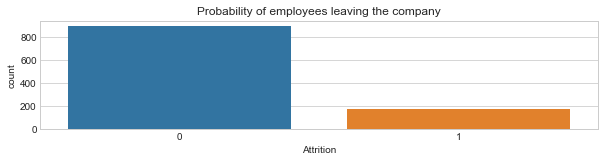

In [24]:
fig, (ax1) = plt.subplots(figsize=(10,2))
ax1 = sns.countplot(x='Attrition', data=presentation, ax=ax1).set_title('Probability of employees leaving the company')

presentation = presentation.sort_values(by='EmployeeID', ascending=True)

<h3>Real Data</h3>

In [21]:
real = pd.DataFrame()
real['EmployeeID'] = Index_test
real['Attrition'] = Y_test
real.head(15)

,EmployeeID,Attrition
133,142,0
3594,3691,0
497,517,0
3226,3316,0
2312,2383,0
1220,1259,0
3370,3462,1
3111,3199,0
1706,1760,1
2656,2735,0


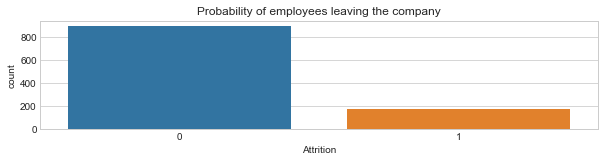

In [25]:
fig, (ax1) = plt.subplots(figsize=(10,2))
ax1 = sns.countplot(x='Attrition', data=real, ax=ax1).set_title('Probability of employees leaving the company')

presentation = real.sort_values(by='EmployeeID', ascending=True)